### Edgar Moises Hernandez-Gonzalez
#### 19/11/19-12/02/20
#### Clasificacion de imagenes motoras en EEG con ConvLSTM2D
##### Caracteristicas = RWE-DWT
##### 5 ejecuciones independientes

##### Sujeto 1
##### Accuracy = 54.51%
##### Kappa = 0.3935

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import cohen_kappa_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA01E.csv", header=None)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 66)
(288, 66)
(288, 1)
(288, 1)


In [ ]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [ ]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [ ]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#convertir de 2D a 5D
x_train = x_train.reshape((n_samples_train, 1, 1, 22, 3))
x_test = x_test.reshape((n_samples_test, 1, 1, 22, 3))

print(x_train.shape)
print(x_test.shape)

(288, 1, 1, 22, 3)
(288, 1, 1, 22, 3)


In [ ]:
x_train = np.transpose(x_train, (0,1,2,4,3))
x_test = np.transpose(x_test, (0,1,2,4,3))

print(x_train.shape)
print(x_test.shape)

(288, 1, 1, 3, 22)
(288, 1, 1, 3, 22)


In [ ]:
def Conv_LSTM_2D():
  model = Sequential()
  model.add(ConvLSTM2D(128, (1,3), activation='relu', padding='same',
                       input_shape=x_train.shape[1:]))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(n_classes, activation='softmax'))

  optimizer = Adam(lr=1e-3)
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

Iteration: 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
288/288 - 0s - loss: 5.2565 - acc: 0.5278
kappa:  0.37037037037037035
f1: 0.5300529745917669
confusion matrix:
 [[44 10  9  9]
 [22 39  9  2]
 [ 4  3 30 35]
 [13  1 19 39]]


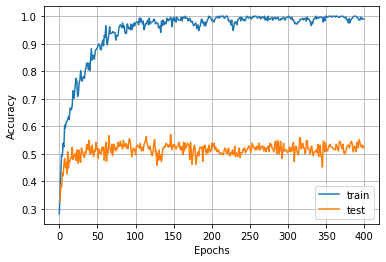

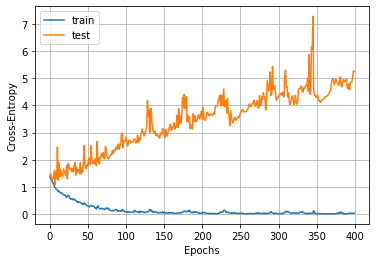

Iteration: 2
288/288 - 0s - loss: 4.2324 - acc: 0.4826
kappa:  0.31018518518518523
f1: 0.4827259786471391
confusion matrix:
 [[34 20 11  7]
 [18 44  8  2]
 [ 5  4 26 37]
 [10  3 24 35]]


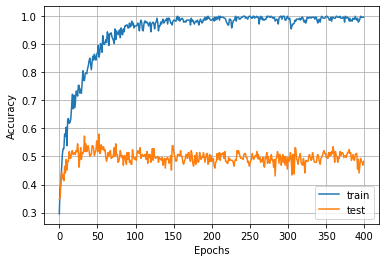

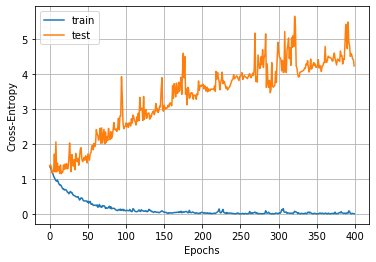

Iteration: 3
288/288 - 0s - loss: 4.5837 - acc: 0.5382
kappa:  0.3842592592592593
f1: 0.5331329629328858
confusion matrix:
 [[31 28  7  6]
 [11 53  7  1]
 [ 9  2 35 26]
 [ 8  5 23 36]]


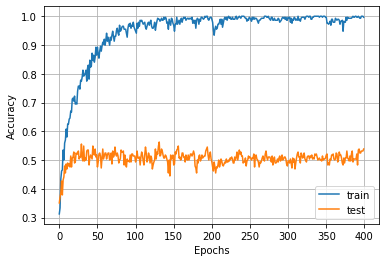

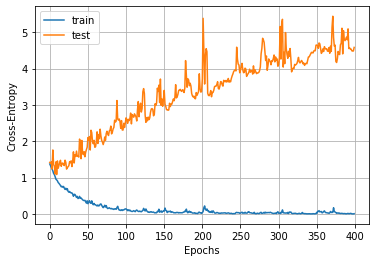

Iteration: 4
288/288 - 0s - loss: 4.4363 - acc: 0.4861
kappa:  0.31481481481481477
f1: 0.4858463775105455
confusion matrix:
 [[34 22 10  6]
 [20 45  6  1]
 [12  4 29 27]
 [12  2 26 32]]


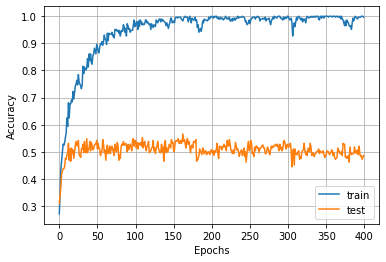

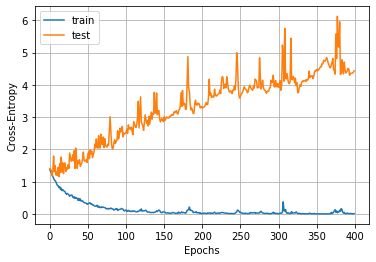

Iteration: 5
288/288 - 0s - loss: 4.7399 - acc: 0.4896
kappa:  0.3194444444444444
f1: 0.49127662022156826
confusion matrix:
 [[41 16  8  7]
 [28 34  9  1]
 [14  3 31 24]
 [14  1 22 35]]


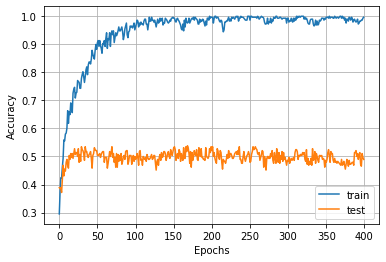

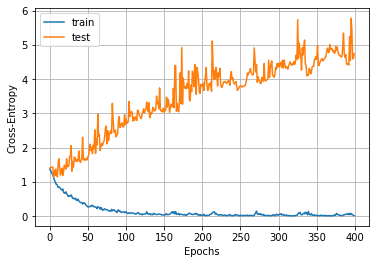


Resultados:
loss: [5.256541305118137, 4.2323578463660345, 4.583736605114407, 4.436304065916273, 4.739887475967407]
accuracy: [0.5277778, 0.4826389, 0.5381944, 0.4861111, 0.48958334]
kappa: [0.37037037037037035, 0.31018518518518523, 0.3842592592592593, 0.31481481481481477, 0.3194444444444444]
f1: [0.5300529745917669, 0.4827259786471391, 0.5331329629328858, 0.4858463775105455, 0.49127662022156826]


In [ ]:
array_loss = []
array_acc = []
array_kappa = []
array_f1 = []
for i in range(5):
    print("Iteration:", i+1);
    
    model = Conv_LSTM_2D()

    history = model.fit(x_train, y_train, epochs=400, batch_size=18,
                        validation_data=(x_test, y_test), verbose=0)
    
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    array_loss.append(test_loss)
    array_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    
    kappa = cohen_kappa_score(y_test, y_pred)
    array_kappa.append(kappa)
    print("kappa: ", kappa)

    f1 = f1_score(y_test, y_pred, average='macro')
    array_f1.append(f1)
    print("f1:", f1)
    
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_loss)
print("accuracy:", array_acc)
print("kappa:", array_kappa)
print("f1:", array_f1)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_4 (ConvLSTM2D)  (None, 1, 3, 128)         230912    
_________________________________________________________________
dropout_8 (Dropout)          (None, 1, 3, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               49280     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 516       
Total params: 280,708
Trainable params: 280,708
Non-trainable params: 0
________________________________________________

In [ ]:
print("Mean Accuracy: %.4f" % np.mean(array_acc))
print("Mean Kappa: %.4f" % np.mean(array_kappa))
print("Mean F1: %.4f" % np.mean(array_f1))
print("Max Accuracy: %.4f" % np.max(array_acc))
print("Max Kappa: %.4f" % np.max(array_kappa))
print("Max F1: %.4f" % np.max(array_f1))

Mean Accuracy: 0.5049
Mean Kappa: 0.3398
Mean F1: 0.5046
Max Accuracy: 0.5382
Max Kappa: 0.3843
Max F1: 0.5331
